In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

if os.path.isdir("/content/drive/MyDrive/ServeNet-master"):
  os.chdir("/content/drive/MyDrive/ServeNet-master")
else: 
  !git clone https://github.com/yylonly/ServeNet.git
  os.chdir("/content/drive/My Drive/ServeNet")

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install bert-tensorflow==1.0.1

     |████████████████████████████████| 71kB 2.9MB/s 


In [ ]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [ ]:
import h5py
import numpy as np
from pandas import HDFStore, read_hdf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
#import seaborn as sns
import csv
import h5py
np.random.seed(0)
%matplotlib inline

### Load Data

In [ ]:
top50datapp = read_hdf('Data/AppWithName-26.h5', key='AllData')
top50datapp.head()

,ServiceName,ServiceDescription,ServiceClassification
0,Computer Cabs Taxi App,Computer Cabs Taxi App \nFor booking Taxi’s an...,Travel
1,Computer Dictionary English,- 100% FREE Computer Dictionary with sound in ...,Reference
2,ComX VR - Comics and Manga,ComX VR is going to change the way you explore...,Book
3,Confession Planner,Confession Planner is intended for persons abo...,Reference
4,Confidence Bible Verses,Daily Confidence Bible Verses will give one Bi...,Book


In [ ]:
top50datapp.shape

(78366, 3)

## 2. Random Sampling by Catagories Precentage

In [ ]:
top50datapp['ServiceClassification']

0        Education
1        Education
2        Education
3           Travel
4        Reference
           ...    
90113       Sports
90114        Music
90115        Music
90116        Music
90117     Stickers
Name: ServiceClassification, Length: 90118, dtype: object

In [ ]:
top50datapp[top50datapp['ServiceClassification'] == 'Business']

,ServiceName,ServiceDescription,ServiceClassification
19,Omniata Event API,Omniata is a customer data platform designed f...,Business
195,Backstitch API,The Backstitch API intends to allow for develo...,Business
246,Hubtel Vend API,"The Hubtel Vend API facilitates bill payments,...",Business
488,Clearbit Webhooks API,Clearbit Webhooks allows developers to access ...,Business
737,Clearbit Streaming API,The Clearbit Streaming REST API allows develop...,Business
...,...,...,...
14297,Clearbit Prospector API,The Clearbit Prospector API integrates contact...,Business
14320,HubSpot Company Properties API,The HubSpot Company Properties API allows deve...,Business
14444,Clearbit Enrichment API,The Clearbit Enrichment API integrates person ...,Business
14630,Omniata User State API,Omniata is a customer data platform designed f...,Business


In [ ]:
Train = []
Test = []

for c in set(top50datapp['ServiceClassification']):
    C_data = top50datapp[top50datapp['ServiceClassification'] == c]
    C_Train, C_Test = train_test_split(C_data, test_size=0.2, random_state=0)
    Train.append(C_Train)
    Test.append(C_Test)
    
Train_C = pd.concat(Train)
Test_C = pd.concat(Test)

In [ ]:
print(Train_C.shape)
print(Test_C.shape)

(72084, 3)
(18034, 3)


In [ ]:
Train_C.head()

,ServiceName,ServiceDescription,ServiceClassification
36723,BB Teaching Clock,Practice how to tell time\n\nAn easy app that ...,Education
34343,Arch•i Rome,Welcome to the Roman Forum!\nDo you need a sma...,Education
35163,Atrodi burtus,"The interactive game ""Find a letter"" that oper...",Education
37809,BitClick,Are you shy and cannot offer your girl-friend ...,Education
37758,Birds Puzzles For Kids,This game for toddlers is a perfect blend of f...,Education


In [ ]:
Trainlabelcount = Train_C['ServiceClassification'].value_counts()

In [ ]:
trainP = Trainlabelcount/Trainlabelcount.sum()

In [ ]:
Testlabelcount = Test_C['ServiceClassification'].value_counts()

In [ ]:
Testlabelcount = Testlabelcount[Trainlabelcount.index]

In [ ]:
TestP = Testlabelcount/Testlabelcount.sum()

In [ ]:
comparedf = pd.DataFrame({'Training Set': trainP, 'Test Set': TestP})

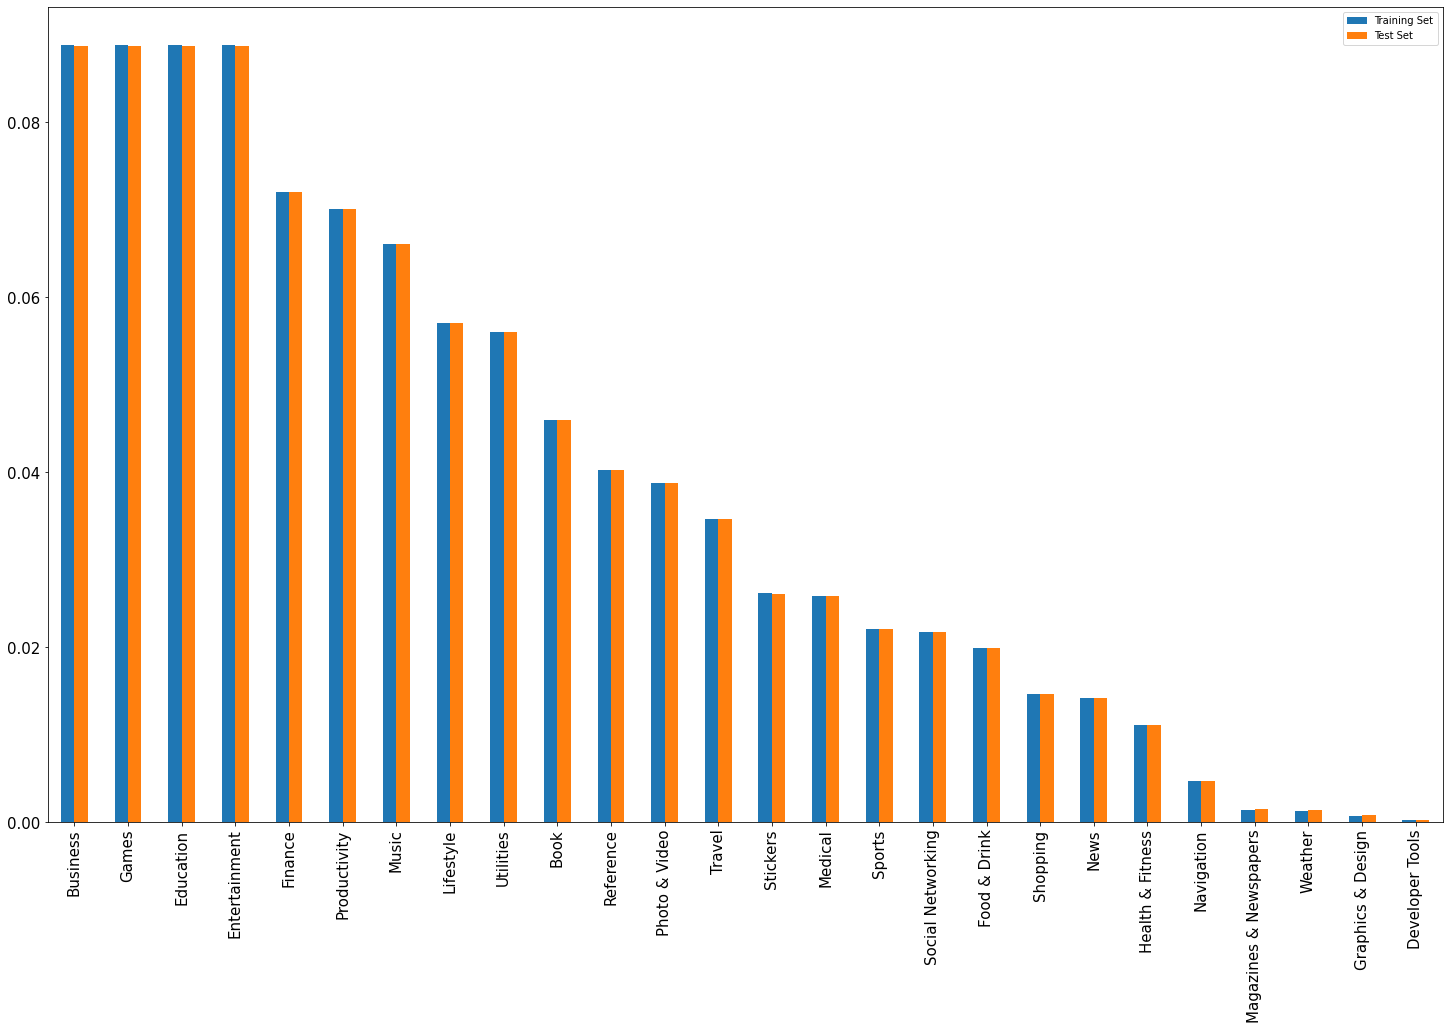

In [ ]:
comparedf.plot(kind='bar', figsize=(25, 15),  fontsize=15)
plt.savefig('Data/Comparasion_Trans_Test_Categories_precentage-service-26.pdf', format='pdf', dpi=300)

## Save as H5 file (pd to h5)

In [ ]:
## shuffle
Train_C = Train_C.sample(frac=1)
Test_C = Test_C.sample(frac=1)

In [ ]:
h5f = HDFStore('Data/RandomSplittedByCatagories-AppName-26.h5')
h5f.put('AllData', top50datapp, format='table')
h5f.put('Train', Train_C, format='table')
h5f.put('Test', Test_C, format='table')
h5f.close()

In [ ]:
train = read_hdf('Data/RandomSplittedByCatagories-AppName-26.h5', key='Train')
test = read_hdf('Data/RandomSplittedByCatagories-AppName-26.h5', key='Test')
print(train.shape)
print(test.shape)

(72084, 3)
(18034, 3)


## Random 10 times

In [ ]:
# for i in range(0, 10):

#     Train = []
#     Test = []

#     for c in set(top50data['Service Classification']):
#         C_data = top50data[top50data['Service Classification'] == c]
#         C_Train, C_Test = train_test_split(C_data, test_size=0.2, random_state=i)
#         Train.append(C_Train)
#         Test.append(C_Test)

#     Train_C = pd.concat(Train)
#     Test_C = pd.concat(Test)
    
#     Train_C = Train_C.sample(frac=1)
#     Test_C = Test_C.sample(frac=1)
    
#     h5f = HDFStore('../Data/RandomSplittedByCatagories' + str(i) + '.h5')
#     h5f.put('AllData', top50data)
#     h5f.put('Train', Train_C)
#     h5f.put('Test', Test_C)
#     h5f.close()

In [ ]:
train

,ServiceName,ServiceDescription,ServiceClassification
10441,SciBite API,SciBite is a drug discovery search engine that...,Medical
1317,TravEnjoy API,Use the TravEnjoy API to search for flights in...,Travel
14718,Orion's Belt API,The Orion's Belt API allows developers to buil...,Games
13171,Bazaarvoice Platform API,Bazaarvoice is a social marketing company that...,Social
10312,Verivo Akula API,Verivo is a enterprise mobile application deve...,Enterprise
...,...,...,...
14521,NutchWAX OpenSearch API,The WWWoH project is an attempt to establish a...,Search
1252,ECGridOS EDI API,ECGridOS is the only API-based (over 110 funct...,Tools
2027,OCBC Maternity Insurance API,The OCBC Maternity Insurance API provides a li...,Financial
12749,shelby.tv API,shelby.tv is an interactive online video playe...,Video


In [ ]:
train.to_csv("Data/train-source-26.csv", index=False)
train

,ServiceName,ServiceDescription,ServiceClassification
68312,AceCam Frame and Border Camera,* LIMITED TIME PROMOTION * \n\nAceCamFrame add...,Photo & Video
16415,CofE General Synod,The General Synod app is designed for use by m...,Productivity
28618,Laws of Ballistics,This is an app for ballistic calculation in ph...,Education
9329,Bitdepositary,Bitdepositary is a secure BDT Coin Wallet App ...,Business
15501,Clairity Pro,Configure or reconfigure your nLight AIR light...,Business
...,...,...,...
9832,Bluecrew - Find Flexible Work,Install Bluecrew for FREE today and join the 3...,Business
52347,Deep Blue Adventures,Imagine if a child could hear a Bible lesson S...,Games
5693,Puss In Boots - Discovery,Preview the first pages of the fabulous animat...,Book
56224,Girl Come Home,Game Introduction: \n\nPoor little girl is los...,Games


In [ ]:
train['ServiceDescriptionLength'] = train['ServiceDescription'].str.len()
train.sort_values('ServiceDescriptionLength', ascending=True, inplace=True)
train.to_csv("Data/train-26-sort.csv", index=False)
train[0:31]

,ServiceName,ServiceDescription,ServiceClassification,ServiceDescriptionLength
14284,CGF,CGF Portal,Sports,10
3189,LASSP,LASSP ebook,Book,11
81358,FM 10 - 97.3,FM 10 - 97.3,Music,12
30777,MV360,MV360 Client,Photo & Video,12
87632,MFM Shasha Region59 Lagos,Region59 Live,Music,13
140,CW MARS,C/W Mars mobile,Book,15
83100,Halloween Ghosts,Happy Halloween!,Stickers,16
87034,Majestic Unicorn Stickers,Unicorn stickers,Stickers,16
38792,UpLevo,A survey platform,Food & Drink,17
5969,Reminder Notes Cloud,Remember my notes,Book,17


In [ ]:
train[0:100]

,ServiceName,ServiceDescription,ServiceClassification,ServiceDescriptionLength
40155,BaanTeedin,BaanTeedin,Business,10
11124,CA CMS Client,CMS Client,Business,10
145870,Onomatope,enjoy it!!,Education,10
57458,MyAgentApp,MyAgentApp,Business,10
23169,Esh3arTech,Esh3arTech,Business,10
...,...,...,...,...
63013,Paxer for Hotels,Paxer App for hotels,Business,20
75047,Smart LSS CMS Client,Smart LSS CMS Client,Business,20
19880,Divorce Help App,The Divorce Help App,Business,20
173427,3Satz! Rechner,Dreisatz Berechnung.,Education,20


In [ ]:
test.to_csv("Data/test-source-26.csv", index=False)
test

,ServiceName,ServiceDescription,ServiceClassification
14038,Kontagent API,Kontangent is a user analytics platform that f...,Social
10233,FalconLog API,Falcon 4.0 is a video game and combat flight s...,Games
13698,Location Labs Spatial Storage API,Location Labs brings safety and innovation to ...,Search
1197,CyberSource Simple API,CyberSource helps you accept payments on your ...,Payments
13333,InfiniteGraph API,InfiniteGraph offers a data management alterna...,Database
...,...,...,...
1695,DBS Utilities API,The DBS Monitoring APIs helps Partner apps to ...,Banking
13655,NHXS API,NHXS is a provider of contract compliance and ...,Other
2705,Alta5 API,The Alta5 API allows developers to access and ...,Financial
1643,Coinone API,Coinone is South-Korea based cryptocurrency ex...,Financial


In [ ]:
test['ServiceDescriptionLength'] = test['ServiceDescription'].str.len()
test.sort_values('ServiceDescriptionLength', ascending=True, inplace=True)
test.to_csv("Data/test-26-sort.csv", index=False)
test

,ServiceName,ServiceDescription,ServiceClassification,ServiceDescriptionLength
87249,Master 97.3 FM,The Best Music,Music,14
86120,Life 103.1,Timeless Favorites,Music,18
82591,Good friends play on word 2,Let's play on word!,Stickers,19
80967,Feelings various panda Move,It's a moving panda,Stickers,19
86268,Little Baby Stickers,Little baby stickers,Stickers,20
...,...,...,...,...
79651,Dress Up Game for Teen Girls: Back to School! ...,"***High school fashion queens, get ready for t...",Lifestyle,4000
62835,ScalePlay,ScalePlay is a generative music app capable of...,Music,4000
65168,Uilleann - Irish Bagpipes,Uilleann is an extremely authentic sounding Fu...,Music,4000
48558,BibleBento,"BibleBento - Unique Resources, High-Quality Da...",Reference,4000


# Pepare Data in Mini-batch Set

In [ ]:
DATA_COLUMN = 'ServiceDescription'
LABEL_COLUMN = 'ServiceClassification'
# label_list is the list of labels, i.e. True, False or 0, 1 or 'dog', 'cat'
label_list = set(train['ServiceClassification'])

In [ ]:
label_list

{'Book',
 'Business',
 'Education',
 'Entertainment',
 'Financial',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Images',
 'Lifestyle',
 'Medical',
 'Music',
 'News Services',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Social',
 'Sports',
 'Travel',
 'Utilities',
 'eCommerce'}

In [ ]:
len(label_list)

300

In [ ]:
set(test['ServiceClassification'])

{'Book',
 'Business',
 'Education',
 'Entertainment',
 'Financial',
 'Food & Drink',
 'Games',
 'Graphics & Design',
 'Health & Fitness',
 'Images',
 'Lifestyle',
 'Magazines & Newspapers',
 'Mapping',
 'Medical',
 'Music',
 'News Services',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Social',
 'Sports',
 'Tools',
 'Travel',
 'Utilities',
 'Weather',
 'eCommerce'}

In [ ]:
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
tokenizer.tokenize("This here's an example of using the BERT tokenizer")

['this',
 'here',
 "'",
 's',
 'an',
 'example',
 'of',
 'using',
 'the',
 'bert',
 'token',
 '##izer']

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [ ]:
def prepareData_BERT_MiniBatch(test, batchsize = 32, maxDesLength = 200, maxNameLength = 10):

  testdata = []

  for i, g in test.groupby(np.arange(len(test)) // batchsize):
      # print (g)

      test1_InputExamples = g.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                        text_a = x['ServiceDescription'], 
                                                                        text_b = None, 
                                                                        label = x[LABEL_COLUMN]), axis = 1)

      maxLengthInMiniBatch = len(test1_InputExamples.iloc[-1].text_a)
      print("MiniBatch MaxLength: " + str(maxLengthInMiniBatch))
      
      test2_InputExamples = g.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                        text_a = x['ServiceName'], 
                                                                        text_b = None, 
                                                                        label = x[LABEL_COLUMN]), axis = 1)
      

      #     # We'll set sequences to be at most 128 tokens long.
     
      # # Convert our train and test features to InputFeatures that BERT understands.
      if maxLengthInMiniBatch >= maxDesLength:
         test1_features = bert.run_classifier.convert_examples_to_features(test1_InputExamples, label_list, maxDesLength, tokenizer)
      else:
         test1_features = bert.run_classifier.convert_examples_to_features(test1_InputExamples, label_list, maxLengthInMiniBatch, tokenizer)

      test2_features = bert.run_classifier.convert_examples_to_features(test2_InputExamples, label_list, maxNameLength, tokenizer)    

      X1_test = np.array([o.input_ids for o in test1_features])
      X1_mask_test = np.array([o.input_mask for o in test1_features])
      X1_segment_test = np.array([o.segment_ids for o in test1_features])

      X2_test = np.array([o.input_ids for o in test2_features])
      X2_mask_test = np.array([o.input_mask for o in test2_features])
      X2_segment_test = np.array([o.segment_ids for o in test2_features])

      Y_test = np.array([o.label_id for o in test2_features])
      print(Y_test[0])
      Test_Y_one_hot = convert_to_one_hot(Y_test, 50)
      print(Test_Y_one_hot[0])

      data = [X1_test, X1_mask_test, X1_segment_test, X2_test, X2_mask_test, X2_segment_test], Test_Y_one_hot
    
      testdata.append(data)
  
  return testdata

In [ ]:
traindata = prepareData_BERT_MiniBatch(train, batchsize = 32)
import pickle
  
f = open('Data/BERT-AppDatasetWithNameMiniBatch-TrainData-26.pickle', 'wb')
pickle.dump(traindata, f)
f.close()
testdata = prepareData_BERT_MiniBatch(test, batchsize = 32)
import pickle
  
f = open('Data/BERT-AppDatasetWithNameMiniBatch-TestData-26.pickle', 'wb')
pickle.dump(testdata, f)
f.close()
import pickle

f = open('Data/BERT-AppDatasetWithNameMiniBatch-TrainData-26.pickle', 'rb')
traindataLoaded = pickle.load(f)
f.close()
import pickle

f = open('Data/BERT-AppDatasetWithNameMiniBatch-TestData-26.pickle', 'rb')
testloaded = pickle.load(f)
f.close()
len(testloaded)
type(testloaded[0][0][0])

MiniBatch MaxLength: 20



INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c ##gf portal [SEP]


INFO:tensorflow:tokens: [CLS] c ##gf portal [SEP]


INFO:tensorflow:input_ids: 101 1039 25708 9445 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1039 25708 9445 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] lass ##p ebook [SEP]


INFO:tensorflow:tokens: [CLS] lass ##p ebook [SEP]


INFO:tensorflow:input_ids: 101 27333 2361 26885 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 27333 2361 26885 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fm 10 - 97 . 3 [SEP]


INFO:tensorflow:tokens: [CLS] fm 10 - 97 . 3 [SEP]


INFO:tensorflow:input_ids: 101 4718 2184 1011 5989 1012 1017 102 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4718 2184 1011 5989 1012 1017 102 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mv ##36 ##0 client [SEP]


INFO:tensorflow:tokens: [CLS] mv ##36 ##0 client [SEP]


INFO:tensorflow:input_ids: 101 19842 21619 2692 7396 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 19842 21619 2692 7396 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] region ##59 live [SEP]


INFO:tensorflow:tokens: [CLS] region ##59 live [SEP]


INFO:tensorflow:input_ids: 101 2555 28154 2444 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2555 28154 2444 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c ##gf [SEP]


INFO:tensorflow:tokens: [CLS] c ##gf [SEP]


INFO:tensorflow:input_ids: 101 1039 25708 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1039 25708 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] lass ##p [SEP]


INFO:tensorflow:tokens: [CLS] lass ##p [SEP]


INFO:tensorflow:input_ids: 101 27333 2361 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 27333 2361 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fm 10 - 97 . 3 [SEP]


INFO:tensorflow:tokens: [CLS] fm 10 - 97 . 3 [SEP]


INFO:tensorflow:input_ids: 101 4718 2184 1011 5989 1012 1017 102 0 0


INFO:tensorflow:input_ids: 101 4718 2184 1011 5989 1012 1017 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mv ##36 ##0 [SEP]


INFO:tensorflow:tokens: [CLS] mv ##36 ##0 [SEP]


INFO:tensorflow:input_ids: 101 19842 21619 2692 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 19842 21619 2692 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] m ##fm sha ##sha region ##59 lagos [SEP]


INFO:tensorflow:tokens: [CLS] m ##fm sha ##sha region ##59 lagos [SEP]


INFO:tensorflow:input_ids: 101 1049 16715 21146 7377 2555 28154 16738 102 0


INFO:tensorflow:input_ids: 101 1049 16715 21146 7377 2555 28154 16738 102 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 24
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] pan - da cute stick ##er . [SEP]


INFO:tensorflow:tokens: [CLS] pan - da cute stick ##er . [SEP]


INFO:tensorflow:input_ids: 101 6090 1011 4830 10140 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6090 1011 4830 10140 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] radio 100 % pure vibe ##s [SEP]


INFO:tensorflow:tokens: [CLS] radio 100 % pure vibe ##s [SEP]


INFO:tensorflow:input_ids: 101 2557 2531 1003 5760 21209 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2557 2531 1003 5760 21209 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] free duck wall ##paper ##s ! [SEP]


INFO:tensorflow:tokens: [CLS] free duck wall ##paper ##s ! [SEP]


INFO:tensorflow:input_ids: 101 2489 9457 2813 23298 2015 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2489 9457 2813 23298 2015 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] auto world auto sales [SEP]


INFO:tensorflow:tokens: [CLS] auto world auto sales [SEP]


INFO:tensorflow:input_ids: 101 8285 2088 8285 4341 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8285 2088 8285 4341 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] r ##gb test your device . [SEP]


INFO:tensorflow:tokens: [CLS] r ##gb test your device . [SEP]


INFO:tensorflow:input_ids: 101 1054 18259 3231 2115 5080 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1054 18259 3231 2115 5080 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] pan - da [SEP]


INFO:tensorflow:tokens: [CLS] pan - da [SEP]


INFO:tensorflow:input_ids: 101 6090 1011 4830 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6090 1011 4830 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ad ##of ##un web ##rad ##io [SEP]


INFO:tensorflow:tokens: [CLS] ad ##of ##un web ##rad ##io [SEP]


INFO:tensorflow:input_ids: 101 4748 11253 4609 4773 12173 3695 102 0 0


INFO:tensorflow:input_ids: 101 4748 11253 4609 4773 12173 3695 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] duck wall ##paper ##s [SEP]


INFO:tensorflow:tokens: [CLS] duck wall ##paper ##s [SEP]


INFO:tensorflow:input_ids: 101 9457 2813 23298 2015 102 0 0 0 0


INFO:tensorflow:input_ids: 101 9457 2813 23298 2015 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] auto - world [SEP]


INFO:tensorflow:tokens: [CLS] auto - world [SEP]


INFO:tensorflow:input_ids: 101 8285 1011 2088 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8285 1011 2088 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] r ##gb test [SEP]


INFO:tensorflow:tokens: [CLS] r ##gb test [SEP]


INFO:tensorflow:input_ids: 101 1054 18259 3231 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1054 18259 3231 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 27
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] abbreviation for pilots . [SEP]


INFO:tensorflow:tokens: [CLS] abbreviation for pilots . [SEP]


INFO:tensorflow:input_ids: 101 22498 2005 8221 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 22498 2005 8221 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] always use daily stick ##er [SEP]


INFO:tensorflow:tokens: [CLS] always use daily stick ##er [SEP]


INFO:tensorflow:input_ids: 101 2467 2224 3679 6293 2121 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2467 2224 3679 6293 2121 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] christian radio station . [SEP]


INFO:tensorflow:tokens: [CLS] christian radio station . [SEP]


INFO:tensorflow:input_ids: 101 3017 2557 2276 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3017 2557 2276 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] i am watching you firmly ! [SEP]


INFO:tensorflow:tokens: [CLS] i am watching you firmly ! [SEP]


INFO:tensorflow:input_ids: 101 1045 2572 3666 2017 7933 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1045 2572 3666 2017 7933 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the civil law of cambodia [SEP]


INFO:tensorflow:tokens: [CLS] the civil law of cambodia [SEP]


INFO:tensorflow:input_ids: 101 1996 2942 2375 1997 12899 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 2942 2375 1997 12899 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] pilot short codes [SEP]


INFO:tensorflow:tokens: [CLS] pilot short codes [SEP]


INFO:tensorflow:input_ids: 101 4405 2460 9537 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4405 2460 9537 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] always use daily stick ##er [SEP]


INFO:tensorflow:tokens: [CLS] always use daily stick ##er [SEP]


INFO:tensorflow:input_ids: 101 2467 2224 3679 6293 2121 102 0 0 0


INFO:tensorflow:input_ids: 101 2467 2224 3679 6293 2121 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ji ##re ##h church radio [SEP]


INFO:tensorflow:tokens: [CLS] ji ##re ##h church radio [SEP]


INFO:tensorflow:input_ids: 101 10147 2890 2232 2277 2557 102 0 0 0


INFO:tensorflow:input_ids: 101 10147 2890 2232 2277 2557 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] shi ##kar ##une ##ko ##2 [SEP]


INFO:tensorflow:tokens: [CLS] shi ##kar ##une ##ko ##2 [SEP]


INFO:tensorflow:input_ids: 101 11895 6673 9816 3683 2475 102 0 0 0


INFO:tensorflow:input_ids: 101 11895 6673 9816 3683 2475 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ka ##bit civil [SEP]


INFO:tensorflow:tokens: [CLS] ka ##bit civil [SEP]


INFO:tensorflow:input_ids: 101 10556 16313 2942 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10556 16313 2942 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 29
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] sq ##k # collect sq ##k ’ em all ! [SEP]


INFO:tensorflow:tokens: [CLS] sq ##k # collect sq ##k ’ em all ! [SEP]


INFO:tensorflow:input_ids: 101 5490 2243 1001 8145 5490 2243 1521 7861 2035 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5490 2243 1001 8145 5490 2243 1521 7861 2035 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] for administration purposes [SEP]


INFO:tensorflow:tokens: [CLS] for administration purposes [SEP]


INFO:tensorflow:input_ids: 101 2005 3447 5682 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2005 3447 5682 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] sq ##k # collect sq ##k ’ em all ! [SEP]


INFO:tensorflow:tokens: [CLS] sq ##k # collect sq ##k ’ em all ! [SEP]


INFO:tensorflow:input_ids: 101 5490 2243 1001 8145 5490 2243 1521 7861 2035 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5490 2243 1001 8145 5490 2243 1521 7861 2035 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] quiz app about tri ##cho ##sco ##py . [SEP]


INFO:tensorflow:tokens: [CLS] quiz app about tri ##cho ##sco ##py . [SEP]


INFO:tensorflow:input_ids: 101 19461 10439 2055 13012 9905 9363 7685 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 19461 10439 2055 13012 9905 9363 7685 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] taxi service for fall river [SEP]


INFO:tensorflow:tokens: [CLS] taxi service for fall river [SEP]


INFO:tensorflow:input_ids: 101 10095 2326 2005 2991 2314 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10095 2326 2005 2991 2314 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] green hearts stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] green hearts stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 2665 8072 6293 2545 102 0 0 0 0


INFO:tensorflow:input_ids: 101 2665 8072 6293 2545 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] din ha ##vn ad ##min ##ht ##tp ##s [SEP]


INFO:tensorflow:tokens: [CLS] din ha ##vn ad ##min ##ht ##tp ##s [SEP]


INFO:tensorflow:input_ids: 101 11586 5292 16022 4748 10020 11039 25856 2015 102


INFO:tensorflow:input_ids: 101 11586 5292 16022 4748 10020 11039 25856 2015 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] egg plants stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] egg plants stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 8288 4264 6293 2545 102 0 0 0 0


INFO:tensorflow:input_ids: 101 8288 4264 6293 2545 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mt ##rich ##os ##co ##py [SEP]


INFO:tensorflow:tokens: [CLS] mt ##rich ##os ##co ##py [SEP]


INFO:tensorflow:input_ids: 101 11047 13149 2891 3597 7685 102 0 0 0


INFO:tensorflow:input_ids: 101 11047 13149 2891 3597 7685 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] town taxi fall river [SEP]


INFO:tensorflow:tokens: [CLS] town taxi fall river [SEP]


INFO:tensorflow:input_ids: 101 2237 10095 2991 2314 102 0 0 0 0


INFO:tensorflow:input_ids: 101 2237 10095 2991 2314 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 32
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] - 13 cute halloween stick ##ers ! [SEP]


INFO:tensorflow:tokens: [CLS] - 13 cute halloween stick ##ers ! [SEP]


INFO:tensorflow:input_ids: 101 1011 2410 10140 14414 6293 2545 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1011 2410 10140 14414 6293 2545 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] listen to bliss radio jordan . [SEP]


INFO:tensorflow:tokens: [CLS] listen to bliss radio jordan . [SEP]


INFO:tensorflow:input_ids: 101 4952 2000 13670 2557 5207 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4952 2000 13670 2557 5207 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] smart ##do ##cs chatting application [SEP]


INFO:tensorflow:tokens: [CLS] smart ##do ##cs chatting application [SEP]


INFO:tensorflow:input_ids: 101 6047 3527 6169 22331 4646 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6047 3527 6169 22331 4646 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] best online shopping in jordan [SEP]


INFO:tensorflow:tokens: [CLS] best online shopping in jordan [SEP]


INFO:tensorflow:input_ids: 101 2190 3784 6023 1999 5207 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2190 3784 6023 1999 5207 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a cute duck for your messages . [SEP]


INFO:tensorflow:tokens: [CLS] a cute duck for your messages . [SEP]


INFO:tensorflow:input_ids: 101 1037 10140 9457 2005 2115 7696 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1037 10140 9457 2005 2115 7696 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cute halloween stick ##ers pro [SEP]


INFO:tensorflow:tokens: [CLS] cute halloween stick ##ers pro [SEP]


INFO:tensorflow:input_ids: 101 10140 14414 6293 2545 4013 102 0 0 0


INFO:tensorflow:input_ids: 101 10140 14414 6293 2545 4013 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bliss 104 . 3 [SEP]


INFO:tensorflow:tokens: [CLS] bliss 104 . 3 [SEP]


INFO:tensorflow:input_ids: 101 13670 9645 1012 1017 102 0 0 0 0


INFO:tensorflow:input_ids: 101 13670 9645 1012 1017 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] smart ##do ##cs chat ##app [SEP]


INFO:tensorflow:tokens: [CLS] smart ##do ##cs chat ##app [SEP]


INFO:tensorflow:input_ids: 101 6047 3527 6169 11834 29098 102 0 0 0


INFO:tensorflow:input_ids: 101 6047 3527 6169 11834 29098 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mw jordan [SEP]


INFO:tensorflow:tokens: [CLS] mw jordan [SEP]


INFO:tensorflow:input_ids: 101 12464 5207 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 12464 5207 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] lovely duck ##ling - stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] lovely duck ##ling - stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 8403 9457 2989 1011 6293 2545 102 0 0


INFO:tensorflow:input_ids: 101 8403 9457 2989 1011 6293 2545 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 35
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] add funny faces to your messages ! [SEP]


INFO:tensorflow:tokens: [CLS] add funny faces to your messages ! [SEP]


INFO:tensorflow:input_ids: 101 5587 6057 5344 2000 2115 7696 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5587 6057 5344 2000 2115 7696 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] hub for vision summit conferences [SEP]


INFO:tensorflow:tokens: [CLS] hub for vision summit conferences [SEP]


INFO:tensorflow:input_ids: 101 9594 2005 4432 6465 9281 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 9594 2005 4432 6465 9281 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] credit ##card money management tool . [SEP]


INFO:tensorflow:tokens: [CLS] credit ##card money management tool . [SEP]


INFO:tensorflow:input_ids: 101 4923 11522 2769 2968 6994 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4923 11522 2769 2968 6994 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] greeting greeting ##s gathered daily [SEP]


INFO:tensorflow:tokens: [CLS] greeting greeting ##s gathered daily [SEP]


INFO:tensorflow:input_ids: 101 14806 14806 2015 5935 3679 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14806 14806 2015 5935 3679 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] watch the best images of the day ! [SEP]


INFO:tensorflow:tokens: [CLS] watch the best images of the day ! [SEP]


INFO:tensorflow:input_ids: 101 3422 1996 2190 4871 1997 1996 2154 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3422 1996 2190 4871 1997 1996 2154 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] faces stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] faces stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 5344 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5344 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] vision summit hub [SEP]


INFO:tensorflow:tokens: [CLS] vision summit hub [SEP]


INFO:tensorflow:input_ids: 101 4432 6465 9594 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4432 6465 9594 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] credit ##card ##mana ##ge [SEP]


INFO:tensorflow:tokens: [CLS] credit ##card ##mana ##ge [SEP]


INFO:tensorflow:input_ids: 101 4923 11522 24805 3351 102 0 0 0 0


INFO:tensorflow:input_ids: 101 4923 11522 24805 3351 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] greeting gathered daily [SEP]


INFO:tensorflow:tokens: [CLS] greeting gathered daily [SEP]


INFO:tensorflow:input_ids: 101 14806 5935 3679 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14806 5935 3679 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] image of the day rs ##s [SEP]


INFO:tensorflow:tokens: [CLS] image of the day rs ##s [SEP]


INFO:tensorflow:input_ids: 101 3746 1997 1996 2154 12667 2015 102 0 0


INFO:tensorflow:input_ids: 101 3746 1997 1996 2154 12667 2015 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:label: News Services (id = 15)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 37
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] your guide to travelling the world . [SEP]


INFO:tensorflow:tokens: [CLS] your guide to travelling the world . [SEP]


INFO:tensorflow:input_ids: 101 2115 5009 2000 8932 1996 2088 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2115 5009 2000 8932 1996 2088 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] best app for news and entertainment [SEP]


INFO:tensorflow:tokens: [CLS] best app for news and entertainment [SEP]


INFO:tensorflow:input_ids: 101 2190 10439 2005 2739 1998 4024 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2190 10439 2005 2739 1998 4024 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fidelity consulting loan cal ##cula ##tor [SEP]


INFO:tensorflow:tokens: [CLS] fidelity consulting loan cal ##cula ##tor [SEP]


INFO:tensorflow:input_ids: 101 22625 10552 5414 10250 19879 4263 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 22625 10552 5414 10250 19879 4263 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] new year ' s of stinging tongue seal . [SEP]


INFO:tensorflow:tokens: [CLS] new year ' s of stinging tongue seal . [SEP]


INFO:tensorflow:input_ids: 101 2047 2095 1005 1055 1997 22748 4416 7744 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2047 2095 1005 1055 1997 22748 4416 7744 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] use ar camera , photo your fantasy ! [SEP]


INFO:tensorflow:tokens: [CLS] use ar camera , photo your fantasy ! [SEP]


INFO:tensorflow:input_ids: 101 2224 12098 4950 1010 6302 2115 5913 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2224 12098 4950 1010 6302 2115 5913 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] world travel - guide [SEP]


INFO:tensorflow:tokens: [CLS] world travel - guide [SEP]


INFO:tensorflow:input_ids: 101 2088 3604 1011 5009 102 0 0 0 0


INFO:tensorflow:input_ids: 101 2088 3604 1011 5009 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bart ##a ##24 [SEP]


INFO:tensorflow:tokens: [CLS] bart ##a ##24 [SEP]


INFO:tensorflow:input_ids: 101 12075 2050 18827 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 12075 2050 18827 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:label: News Services (id = 15)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fidelity loan cal ##cula ##tor [SEP]


INFO:tensorflow:tokens: [CLS] fidelity loan cal ##cula ##tor [SEP]


INFO:tensorflow:input_ids: 101 22625 5414 10250 19879 4263 102 0 0 0


INFO:tensorflow:input_ids: 101 22625 5414 10250 19879 4263 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:label: Financial (id = 11)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] new year ' s seal [SEP]


INFO:tensorflow:tokens: [CLS] new year ' s seal [SEP]


INFO:tensorflow:input_ids: 101 2047 2095 1005 1055 7744 102 0 0 0


INFO:tensorflow:input_ids: 101 2047 2095 1005 1055 7744 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ar camera lit ##e [SEP]


INFO:tensorflow:tokens: [CLS] ar camera lit ##e [SEP]


INFO:tensorflow:input_ids: 101 12098 4950 5507 2063 102 0 0 0 0


INFO:tensorflow:input_ids: 101 12098 4950 5507 2063 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 39
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] customer app for locating wholesale ##rs [SEP]


INFO:tensorflow:tokens: [CLS] customer app for locating wholesale ##rs [SEP]


INFO:tensorflow:input_ids: 101 8013 10439 2005 26339 17264 2869 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8013 10439 2005 26339 17264 2869 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] we are a young radio in am ##bon , mal ##uk ##u [SEP]


INFO:tensorflow:tokens: [CLS] we are a young radio in am ##bon , mal ##uk ##u [SEP]


INFO:tensorflow:input_ids: 101 2057 2024 1037 2402 2557 1999 2572 11735 1010 15451 6968 2226 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2057 2024 1037 2402 2557 1999 2572 11735 1010 15451 6968 2226 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the real italian food and win network [SEP]


INFO:tensorflow:tokens: [CLS] the real italian food and win network [SEP]


INFO:tensorflow:input_ids: 101 1996 2613 3059 2833 1998 2663 2897 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 2613 3059 2833 1998 2663 2897 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o cd ##o [SEP]


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o cd ##o [SEP]


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 3729 2080 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 3729 2080 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] este ##ss ads ##kill - tennis news & events [SEP]


INFO:tensorflow:tokens: [CLS] este ##ss ads ##kill - tennis news & events [SEP]


INFO:tensorflow:input_ids: 101 28517 4757 14997 15872 1011 5093 2739 1004 2824 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 28517 4757 14997 15872 1011 5093 2739 1004 2824 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] wholesale ##r [SEP]


INFO:tensorflow:tokens: [CLS] wholesale ##r [SEP]


INFO:tensorflow:input_ids: 101 17264 2099 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 17264 2099 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] du ##ta 90 . 9 fm am ##bon [SEP]


INFO:tensorflow:tokens: [CLS] du ##ta 90 . 9 fm am ##bon [SEP]


INFO:tensorflow:input_ids: 101 4241 2696 3938 1012 1023 4718 2572 11735 102


INFO:tensorflow:input_ids: 101 4241 2696 3938 1012 1023 4718 2572 11735 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] export ##it [SEP]


INFO:tensorflow:tokens: [CLS] export ##it [SEP]


INFO:tensorflow:input_ids: 101 9167 4183 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 9167 4183 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bomb ##o cd ##o [SEP]


INFO:tensorflow:tokens: [CLS] bomb ##o cd ##o [SEP]


INFO:tensorflow:input_ids: 101 5968 2080 3729 2080 102 0 0 0 0


INFO:tensorflow:input_ids: 101 5968 2080 3729 2080 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ads ##kill [SEP]


INFO:tensorflow:tokens: [CLS] ads ##kill [SEP]


INFO:tensorflow:input_ids: 101 14997 15872 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14997 15872 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Sports (id = 4)


INFO:tensorflow:label: Sports (id = 4)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 41
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o da ##vao [SEP]


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o da ##vao [SEP]


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 4830 24682 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 4830 24682 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] q ##rs ##can ##ner for reading info about users . [SEP]


INFO:tensorflow:tokens: [CLS] q ##rs ##can ##ner for reading info about users . [SEP]


INFO:tensorflow:input_ids: 101 1053 2869 9336 3678 2005 3752 18558 2055 5198 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1053 2869 9336 3678 2005 3752 18558 2055 5198 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] record a video - self ##ie with funny faces . [SEP]


INFO:tensorflow:tokens: [CLS] record a video - self ##ie with funny faces . [SEP]


INFO:tensorflow:input_ids: 101 2501 1037 2678 1011 2969 2666 2007 6057 5344 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2501 1037 2678 1011 2969 2666 2007 6057 5344 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] punjabi songs and gu ##rba ##ni sha ##bad ki ##rta ##n [SEP]


INFO:tensorflow:tokens: [CLS] punjabi songs and gu ##rba ##ni sha ##bad ki ##rta ##n [SEP]


INFO:tensorflow:input_ids: 101 17498 2774 1998 19739 28483 3490 21146 9024 11382 13320 2078 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 17498 2774 1998 19739 28483 3490 21146 9024 11382 13320 2078 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] this is a cute rabbit and cat stick ##er . [SEP]


INFO:tensorflow:tokens: [CLS] this is a cute rabbit and cat stick ##er . [SEP]


INFO:tensorflow:input_ids: 101 2023 2003 1037 10140 10442 1998 4937 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2023 2003 1037 10140 10442 1998 4937 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bomb ##o da ##vao [SEP]


INFO:tensorflow:tokens: [CLS] bomb ##o da ##vao [SEP]


INFO:tensorflow:input_ids: 101 5968 2080 4830 24682 102 0 0 0 0


INFO:tensorflow:input_ids: 101 5968 2080 4830 24682 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] au q ##r scanner [SEP]


INFO:tensorflow:tokens: [CLS] au q ##r scanner [SEP]


INFO:tensorflow:input_ids: 101 8740 1053 2099 26221 102 0 0 0 0


INFO:tensorflow:input_ids: 101 8740 1053 2099 26221 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] grimace - amazing faces [SEP]


INFO:tensorflow:tokens: [CLS] grimace - amazing faces [SEP]


INFO:tensorflow:input_ids: 101 25898 1011 6429 5344 102 0 0 0 0


INFO:tensorflow:input_ids: 101 25898 1011 6429 5344 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:label: Photo & Video (id = 24)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] alpha punjabi junction [SEP]


INFO:tensorflow:tokens: [CLS] alpha punjabi junction [SEP]


INFO:tensorflow:input_ids: 101 6541 17498 5098 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6541 17498 5098 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] us ##ya ##gi to ny ##as [SEP]


INFO:tensorflow:tokens: [CLS] us ##ya ##gi to ny ##as [SEP]


INFO:tensorflow:input_ids: 101 2149 3148 5856 2000 6396 3022 102 0 0


INFO:tensorflow:input_ids: 101 2149 3148 5856 2000 6396 3022 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


16
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 42
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o da ##gu ##pan [SEP]


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o da ##gu ##pan [SEP]


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 4830 12193 9739 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 4830 12193 9739 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a collection of different bass ##es and amp ##s [SEP]


INFO:tensorflow:tokens: [CLS] a collection of different bass ##es and amp ##s [SEP]


INFO:tensorflow:input_ids: 101 1037 3074 1997 2367 3321 2229 1998 23713 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1037 3074 1997 2367 3321 2229 1998 23713 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] app to search books in jain g ##yan ##bha ##nda ##rs . [SEP]


INFO:tensorflow:tokens: [CLS] app to search books in jain g ##yan ##bha ##nda ##rs . [SEP]


INFO:tensorflow:input_ids: 101 10439 2000 3945 2808 1999 17136 1043 7054 22655 8943 2869 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10439 2000 3945 2808 1999 17136 1043 7054 22655 8943 2869 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] this is the word that you use frequently . [SEP]


INFO:tensorflow:tokens: [CLS] this is the word that you use frequently . [SEP]


INFO:tensorflow:input_ids: 101 2023 2003 1996 2773 2008 2017 2224 4703 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2023 2003 1996 2773 2008 2017 2224 4703 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o ba ##col ##od [SEP]


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o ba ##col ##od [SEP]


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 8670 25778 7716 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 8670 25778 7716 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bomb ##o da ##gu ##pan [SEP]


INFO:tensorflow:tokens: [CLS] bomb ##o da ##gu ##pan [SEP]


INFO:tensorflow:input_ids: 101 5968 2080 4830 12193 9739 102 0 0 0


INFO:tensorflow:input_ids: 101 5968 2080 4830 12193 9739 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bass stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] bass stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 3321 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3321 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] g ##yan ##bha ##nda ##r [SEP]


INFO:tensorflow:tokens: [CLS] g ##yan ##bha ##nda ##r [SEP]


INFO:tensorflow:input_ids: 101 1043 7054 22655 8943 2099 102 0 0 0


INFO:tensorflow:input_ids: 101 1043 7054 22655 8943 2099 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] good friends loose message [SEP]


INFO:tensorflow:tokens: [CLS] good friends loose message [SEP]


INFO:tensorflow:input_ids: 101 2204 2814 6065 4471 102 0 0 0 0


INFO:tensorflow:input_ids: 101 2204 2814 6065 4471 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bomb ##o ba ##col ##od [SEP]


INFO:tensorflow:tokens: [CLS] bomb ##o ba ##col ##od [SEP]


INFO:tensorflow:input_ids: 101 5968 2080 8670 25778 7716 102 0 0 0


INFO:tensorflow:input_ids: 101 5968 2080 8670 25778 7716 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


16
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 44
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] humorous interpretations of a des ##i mother . [SEP]


INFO:tensorflow:tokens: [CLS] humorous interpretations of a des ##i mother . [SEP]


INFO:tensorflow:input_ids: 101 14742 15931 1997 1037 4078 2072 2388 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14742 15931 1997 1037 4078 2072 2388 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o la union [SEP]


INFO:tensorflow:tokens: [CLS] official radio app of bomb ##o ra ##dy ##o la union [SEP]


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 2474 2586 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2880 2557 10439 1997 5968 2080 10958 5149 2080 2474 2586 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cal ##cula ##tor with history and curve plotting [SEP]


INFO:tensorflow:tokens: [CLS] cal ##cula ##tor with history and curve plotting [SEP]


INFO:tensorflow:input_ids: 101 10250 19879 4263 2007 2381 1998 7774 20699 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10250 19879 4263 2007 2381 1998 7774 20699 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] stay connected with atlanta ' s # 1 nightclub [SEP]


INFO:tensorflow:tokens: [CLS] stay connected with atlanta ' s # 1 nightclub [SEP]


INFO:tensorflow:input_ids: 101 2994 4198 2007 5865 1005 1055 1001 1015 15479 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2994 4198 2007 5865 1005 1055 1001 1015 15479 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] scan q ##r code to record event ' s attendance . [SEP]


INFO:tensorflow:tokens: [CLS] scan q ##r code to record event ' s attendance . [SEP]


INFO:tensorflow:input_ids: 101 13594 1053 2099 3642 2000 2501 2724 1005 1055 5270 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 13594 1053 2099 3642 2000 2501 2724 1005 1055 5270 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] des ##i ma [SEP]


INFO:tensorflow:tokens: [CLS] des ##i ma [SEP]


INFO:tensorflow:input_ids: 101 4078 2072 5003 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4078 2072 5003 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bomb ##o la union [SEP]


INFO:tensorflow:tokens: [CLS] bomb ##o la union [SEP]


INFO:tensorflow:input_ids: 101 5968 2080 2474 2586 102 0 0 0 0


INFO:tensorflow:input_ids: 101 5968 2080 2474 2586 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cal ##cula ##trix [SEP]


INFO:tensorflow:tokens: [CLS] cal ##cula ##trix [SEP]


INFO:tensorflow:input_ids: 101 10250 19879 29184 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10250 19879 29184 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] opera nightclub [SEP]


INFO:tensorflow:tokens: [CLS] opera nightclub [SEP]


INFO:tensorflow:input_ids: 101 3850 15479 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3850 15479 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] u ##um attendance [SEP]


INFO:tensorflow:tokens: [CLS] u ##um attendance [SEP]


INFO:tensorflow:input_ids: 101 1057 2819 5270 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1057 2819 5270 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 46
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] tour sales application for ia ##ti tour guides . [SEP]


INFO:tensorflow:tokens: [CLS] tour sales application for ia ##ti tour guides . [SEP]


INFO:tensorflow:input_ids: 101 2778 4341 4646 2005 24264 3775 2778 12468 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2778 4341 4646 2005 24264 3775 2778 12468 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cheerful dog called in ##uta - san in the winter . [SEP]


INFO:tensorflow:tokens: [CLS] cheerful dog called in ##uta - san in the winter . [SEP]


INFO:tensorflow:input_ids: 101 18350 3899 2170 1999 13210 1011 2624 1999 1996 3467 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 18350 3899 2170 1999 13210 1011 2624 1999 1996 3467 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] palmer square events and store directory app . [SEP]


INFO:tensorflow:tokens: [CLS] palmer square events and store directory app . [SEP]


INFO:tensorflow:input_ids: 101 8809 2675 2824 1998 3573 14176 10439 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8809 2675 2824 1998 3573 14176 10439 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] an easy taxi booking for hotels and companies [SEP]


INFO:tensorflow:tokens: [CLS] an easy taxi booking for hotels and companies [SEP]


INFO:tensorflow:input_ids: 101 2019 3733 10095 21725 2005 9275 1998 3316 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2019 3733 10095 21725 2005 9275 1998 3316 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 20 geometric stick ##ers are simple and st ##yl ##ish ! [SEP]


INFO:tensorflow:tokens: [CLS] 20 geometric stick ##ers are simple and st ##yl ##ish ! [SEP]


INFO:tensorflow:input_ids: 101 2322 14965 6293 2545 2024 3722 1998 2358 8516 4509 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2322 14965 6293 2545 2024 3722 1998 2358 8516 4509 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ia ##ti tour [SEP]


INFO:tensorflow:tokens: [CLS] ia ##ti tour [SEP]


INFO:tensorflow:input_ids: 101 24264 3775 2778 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 24264 3775 2778 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] in ##uta - san / winter [SEP]


INFO:tensorflow:tokens: [CLS] in ##uta - san / winter [SEP]


INFO:tensorflow:input_ids: 101 1999 13210 1011 2624 1013 3467 102 0 0


INFO:tensorflow:input_ids: 101 1999 13210 1011 2624 1013 3467 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] palmer square [SEP]


INFO:tensorflow:tokens: [CLS] palmer square [SEP]


INFO:tensorflow:input_ids: 101 8809 2675 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8809 2675 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] dutch & taxi : booking taxi [SEP]


INFO:tensorflow:tokens: [CLS] dutch & taxi : booking taxi [SEP]


INFO:tensorflow:input_ids: 101 3803 1004 10095 1024 21725 10095 102 0 0


INFO:tensorflow:input_ids: 101 3803 1004 10095 1024 21725 10095 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] geometric stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] geometric stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 14965 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14965 6293 2545 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 49
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] an app for managing real estate property sales [SEP]


INFO:tensorflow:tokens: [CLS] an app for managing real estate property sales [SEP]


INFO:tensorflow:input_ids: 101 2019 10439 2005 6605 2613 3776 3200 4341 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2019 10439 2005 6605 2613 3776 3200 4341 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mobile companion app for cash ##book coup ##on books . [SEP]


INFO:tensorflow:tokens: [CLS] mobile companion app for cash ##book coup ##on books . [SEP]


INFO:tensorflow:input_ids: 101 4684 7452 10439 2005 5356 8654 8648 2239 2808 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4684 7452 10439 2005 5356 8654 8648 2239 2808 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] application to connect restaurant with delivery [SEP]


INFO:tensorflow:tokens: [CLS] application to connect restaurant with delivery [SEP]


INFO:tensorflow:input_ids: 101 4646 2000 7532 4825 2007 6959 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4646 2000 7532 4825 2007 6959 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] calculate the number of days between two dates . [SEP]


INFO:tensorflow:tokens: [CLS] calculate the number of days between two dates . [SEP]


INFO:tensorflow:input_ids: 101 18422 1996 2193 1997 2420 2090 2048 5246 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 18422 1996 2193 1997 2420 2090 2048 5246 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the official app for the upcoming leader summit [SEP]


INFO:tensorflow:tokens: [CLS] the official app for the upcoming leader summit [SEP]


INFO:tensorflow:input_ids: 101 1996 2880 10439 2005 1996 9046 3003 6465 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 2880 10439 2005 1996 9046 3003 6465 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] link connect [SEP]


INFO:tensorflow:tokens: [CLS] link connect [SEP]


INFO:tensorflow:input_ids: 101 4957 7532 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4957 7532 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cash ##book savings [SEP]


INFO:tensorflow:tokens: [CLS] cash ##book savings [SEP]


INFO:tensorflow:input_ids: 101 5356 8654 10995 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 5356 8654 10995 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] rocket - restaurant [SEP]


INFO:tensorflow:tokens: [CLS] rocket - restaurant [SEP]


INFO:tensorflow:input_ids: 101 7596 1011 4825 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 7596 1011 4825 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:label: Food & Drink (id = 19)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] calculate days [SEP]


INFO:tensorflow:tokens: [CLS] calculate days [SEP]


INFO:tensorflow:input_ids: 101 18422 2420 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 18422 2420 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:label: Utilities (id = 17)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] leader summit [SEP]


INFO:tensorflow:tokens: [CLS] leader summit [SEP]


INFO:tensorflow:input_ids: 101 3003 6465 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3003 6465 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 50
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] celebrate mar ##di gr ##as with these fest ##ive stick ##ers . [SEP]


INFO:tensorflow:tokens: [CLS] celebrate mar ##di gr ##as with these fest ##ive stick ##ers . [SEP]


INFO:tensorflow:input_ids: 101 8439 9388 4305 24665 3022 2007 2122 17037 3512 6293 2545 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 8439 9388 4305 24665 3022 2007 2122 17037 3512 6293 2545 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the book of truth app includes all 133 ##5 messages . [SEP]


INFO:tensorflow:tokens: [CLS] the book of truth app includes all 133 ##5 messages . [SEP]


INFO:tensorflow:input_ids: 101 1996 2338 1997 3606 10439 2950 2035 14506 2629 7696 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 2338 1997 3606 10439 2950 2035 14506 2629 7696 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cheerful dog called in ##uta - san . honor ##ific version . [SEP]


INFO:tensorflow:tokens: [CLS] cheerful dog called in ##uta - san . honor ##ific version . [SEP]


INFO:tensorflow:input_ids: 101 18350 3899 2170 1999 13210 1011 2624 1012 3932 18513 2544 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 18350 3899 2170 1999 13210 1011 2624 1012 3932 18513 2544 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 18 cool stick ##ers with deer ! free upgrade forever ! [SEP]


INFO:tensorflow:tokens: [CLS] 18 cool stick ##ers with deer ! free upgrade forever ! [SEP]


INFO:tensorflow:input_ids: 101 2324 4658 6293 2545 2007 8448 999 2489 12200 5091 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2324 4658 6293 2545 2007 8448 999 2489 12200 5091 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] create a free or paid event . sell tickets online . [SEP]


INFO:tensorflow:tokens: [CLS] create a free or paid event . sell tickets online . [SEP]


INFO:tensorflow:input_ids: 101 3443 1037 2489 2030 3825 2724 1012 5271 9735 3784 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3443 1037 2489 2030 3825 2724 1012 5271 9735 3784 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Social (id = 25)


INFO:tensorflow:label: Social (id = 25)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] mar ##di gr ##as stick ##ers [SEP]


INFO:tensorflow:tokens: [CLS] mar ##di gr ##as stick ##ers [SEP]


INFO:tensorflow:input_ids: 101 9388 4305 24665 3022 6293 2545 102 0 0


INFO:tensorflow:input_ids: 101 9388 4305 24665 3022 6293 2545 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the book of truth [SEP]


INFO:tensorflow:tokens: [CLS] the book of truth [SEP]


INFO:tensorflow:input_ids: 101 1996 2338 1997 3606 102 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 2338 1997 3606 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:label: Book (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] in ##uta - san 2 [SEP]


INFO:tensorflow:tokens: [CLS] in ##uta - san 2 [SEP]


INFO:tensorflow:input_ids: 101 1999 13210 1011 2624 1016 102 0 0 0


INFO:tensorflow:input_ids: 101 1999 13210 1011 2624 1016 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] deer - stick ##ers for im ##ess ##age [SEP]


INFO:tensorflow:tokens: [CLS] deer - stick ##ers for im ##ess ##age [SEP]


INFO:tensorflow:input_ids: 101 8448 1011 6293 2545 2005 10047 7971 4270 102


INFO:tensorflow:input_ids: 101 8448 1011 6293 2545 2005 10047 7971 4270 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fell ##opa ##ges [SEP]


INFO:tensorflow:tokens: [CLS] fell ##opa ##ges [SEP]


INFO:tensorflow:input_ids: 101 3062 29477 8449 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3062 29477 8449 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Social (id = 25)


INFO:tensorflow:label: Social (id = 25)


8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 52
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c ##gg ##en power app ch ##hat ##tis ##garh state power companies [SEP]


INFO:tensorflow:tokens: [CLS] c ##gg ##en power app ch ##hat ##tis ##garh state power companies [SEP]


INFO:tensorflow:input_ids: 101 1039 13871 2368 2373 10439 10381 12707 7315 13484 2110 2373 3316 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1039 13871 2368 2373 10439 10381 12707 7315 13484 2110 2373 3316 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the panda which can be used in conversation daily . [SEP]


INFO:tensorflow:tokens: [CLS] the panda which can be used in conversation daily . [SEP]


INFO:tensorflow:input_ids: 101 1996 25462 2029 2064 2022 2109 1999 4512 3679 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 25462 2029 2064 2022 2109 1999 4512 3679 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fleet and transfer manager for transfer companies . [SEP]


INFO:tensorflow:tokens: [CLS] fleet and transfer manager for transfer companies . [SEP]


INFO:tensorflow:input_ids: 101 4170 1998 4651 3208 2005 4651 3316 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4170 1998 4651 3208 2005 4651 3316 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] protocols , medications , and procedures from kc ##em ##ss [SEP]


INFO:tensorflow:tokens: [CLS] protocols , medications , and procedures from kc ##em ##ss [SEP]


INFO:tensorflow:input_ids: 101 16744 1010 20992 1010 1998 8853 2013 21117 6633 4757 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 16744 1010 20992 1010 1998 8853 2013 21117 6633 4757 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] this is a black kitten and white kitten ' s stick ##er . [SEP]


INFO:tensorflow:tokens: [CLS] this is a black kitten and white kitten ' s stick ##er . [SEP]


INFO:tensorflow:input_ids: 101 2023 2003 1037 2304 18401 1998 2317 18401 1005 1055 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2023 2003 1037 2304 18401 1998 2317 18401 1005 1055 6293 2121 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c ##gg ##en [SEP]


INFO:tensorflow:tokens: [CLS] c ##gg ##en [SEP]


INFO:tensorflow:input_ids: 101 1039 13871 2368 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1039 13871 2368 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:label: Productivity (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] convenient panda [SEP]


INFO:tensorflow:tokens: [CLS] convenient panda [SEP]


INFO:tensorflow:input_ids: 101 14057 25462 102 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 14057 25462 102 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fox ##fleet manager [SEP]


INFO:tensorflow:tokens: [CLS] fox ##fleet manager [SEP]


INFO:tensorflow:input_ids: 101 4419 27657 3208 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4419 27657 3208 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:label: Travel (id = 14)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] kc ##em ##ss ##2 [SEP]


INFO:tensorflow:tokens: [CLS] kc ##em ##ss ##2 [SEP]


INFO:tensorflow:input_ids: 101 21117 6633 4757 2475 102 0 0 0 0


INFO:tensorflow:input_ids: 101 21117 6633 4757 2475 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:label: Medical (id = 21)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] black kitten & white kitten [SEP]


INFO:tensorflow:tokens: [CLS] black kitten & white kitten [SEP]


INFO:tensorflow:input_ids: 101 2304 18401 1004 2317 18401 102 0 0 0


INFO:tensorflow:input_ids: 101 2304 18401 1004 2317 18401 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 53
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] one stop shop for hospitality jan ##itor ##ial & products . [SEP]


INFO:tensorflow:tokens: [CLS] one stop shop for hospitality jan ##itor ##ial & products . [SEP]


INFO:tensorflow:input_ids: 101 2028 2644 4497 2005 15961 5553 15660 4818 1004 3688 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2028 2644 4497 2005 15961 5553 15660 4818 1004 3688 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the 3 ##e ( expansive , eclectic , exponential ) experience [SEP]


INFO:tensorflow:tokens: [CLS] the 3 ##e ( expansive , eclectic , exponential ) experience [SEP]


INFO:tensorflow:input_ids: 101 1996 1017 2063 1006 25145 1010 20551 1010 27258 1007 3325 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 1017 2063 1006 25145 1010 20551 1010 27258 1007 3325 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] employee al ##pac ##a working hard . illustrated by usage ##en ##u [SEP]


INFO:tensorflow:tokens: [CLS] employee al ##pac ##a working hard . illustrated by usage ##en ##u [SEP]


INFO:tensorflow:input_ids: 101 7904 2632 19498 2050 2551 2524 1012 7203 2011 8192 2368 2226 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 7904 2632 19498 2050 2551 2524 1012 7203 2011 8192 2368 2226 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] exploit your messages with these explosive stick ##ers ! [SEP]


INFO:tensorflow:tokens: [CLS] exploit your messages with these explosive stick ##ers ! [SEP]


INFO:tensorflow:input_ids: 101 18077 2115 7696 2007 2122 11355 6293 2545 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 18077 2115 7696 2007 2122 11355 6293 2545 999 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] your guide to the mental health act 2001 of ireland . [SEP]


INFO:tensorflow:tokens: [CLS] your guide to the mental health act 2001 of ireland . [SEP]


INFO:tensorflow:input_ids: 101 2115 5009 2000 1996 5177 2740 2552 2541 1997 3163 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2115 5009 2000 1996 5177 2740 2552 2541 1997 3163 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Reference (id = 22)


INFO:tensorflow:label: Reference (id = 22)


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] goa ##v ##m [SEP]


INFO:tensorflow:tokens: [CLS] goa ##v ##m [SEP]


INFO:tensorflow:input_ids: 101 15244 2615 2213 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 15244 2615 2213 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:label: eCommerce (id = 5)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] bush ##rod ##music radio [SEP]


INFO:tensorflow:tokens: [CLS] bush ##rod ##music radio [SEP]


INFO:tensorflow:input_ids: 101 5747 14127 27275 2557 102 0 0 0 0


INFO:tensorflow:input_ids: 101 5747 14127 27275 2557 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:label: Music (id = 16)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] employee al ##pac ##a [SEP]


INFO:tensorflow:tokens: [CLS] employee al ##pac ##a [SEP]


INFO:tensorflow:input_ids: 101 7904 2632 19498 2050 102 0 0 0 0


INFO:tensorflow:input_ids: 101 7904 2632 19498 2050 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] boom stick ##ers pro [SEP]


INFO:tensorflow:tokens: [CLS] boom stick ##ers pro [SEP]


INFO:tensorflow:input_ids: 101 8797 6293 2545 4013 102 0 0 0 0


INFO:tensorflow:input_ids: 101 8797 6293 2545 4013 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:label: Images (id = 8)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] m ##ha guide ##book [SEP]


INFO:tensorflow:tokens: [CLS] m ##ha guide ##book [SEP]


INFO:tensorflow:input_ids: 101 1049 3270 5009 8654 102 0 0 0 0


INFO:tensorflow:input_ids: 101 1049 3270 5009 8654 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: Reference (id = 22)


INFO:tensorflow:label: Reference (id = 22)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
MiniBatch MaxLength: 55
INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:Writing example 0 of 32


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ist ##ude ##nt is social network for every georgian student . [SEP]


INFO:tensorflow:tokens: [CLS] ist ##ude ##nt is social network for every georgian student . [SEP]


INFO:tensorflow:input_ids: 101 21541 12672 3372 2003 2591 2897 2005 2296 9166 3076 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 21541 12672 3372 2003 2591 2897 2005 2296 9166 3076 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
